# **Import Libraries**

In [212]:
print("Download libraries")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download libraries


# **Download Data**

In [213]:
data_cipher = pd.read_csv(r'.\C_and_D_png\files_csv\cifrado.csv')
data_decoded = pd.read_csv(r'.\C_and_D_png\files_csv\descifrado.csv')

# **Algorithm RSA**

## **Image Ciphers (PNG,JPG)** 

In [214]:
data_cipher.head()

,TimeStamp,Pixel_Value,Ciphered_Value
0,0.0,"(255, 255, 255, 255)","(42970, 42970, 42970, 42970)"
1,0.0,"(255, 255, 255, 255)","(42970, 42970, 42970, 42970)"
2,0.0,"(255, 255, 255, 255)","(42970, 42970, 42970, 42970)"
3,0.0,"(255, 255, 255, 255)","(42970, 42970, 42970, 42970)"
4,0.0,"(255, 255, 255, 255)","(42970, 42970, 42970, 42970)"


In [215]:
data_cipher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66612 entries, 0 to 66611
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TimeStamp       66612 non-null  float64
 1   Pixel_Value     66612 non-null  object 
 2   Ciphered_Value  66612 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


## **Cipher Time**

In [216]:
data_cipher.describe()

,TimeStamp
count,66612.000000
mean,0.000006
std,0.000118
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.021001


In [217]:
# Time to cipher one pixel (X,X,X,X) in miliseconds:
# Time min: 0.0000 
# Time max: 0.021001
# Time mean: 0.000006

In [219]:
TimeStamp_count = data_cipher['TimeStamp'].value_counts()
TimeStamp_count

TimeStamp
0.000000    66264
0.001000       66
0.001000       49
0.001000       48
0.001000       27
0.000999       25
0.001001       16
0.000999       14
0.000999       14
0.001001       11
0.001001        9
0.000999        7
0.000998        6
0.000998        5
0.001002        4
0.000998        3
0.001002        3
0.000998        3
0.001003        2
0.000996        2
0.000998        2
0.000997        2
0.001021        1
0.001028        1
0.000991        1
0.000982        1
0.021001        1
0.000997        1
0.000997        1
0.000982        1
0.001024        1
0.001024        1
0.001004        1
0.000977        1
0.000993        1
0.000979        1
0.000989        1
0.011008        1
0.000976        1
0.001025        1
0.000975        1
0.001003        1
0.001001        1
0.001012        1
0.001002        1
0.000996        1
0.001007        1
0.001004        1
0.000996        1
0.001003        1
0.005011        1
0.001003        1
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_17980\3700370391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TimeStamp_counts_filtered.index.astype(str), y=TimeStamp_counts_filtered.values, palette="viridis")


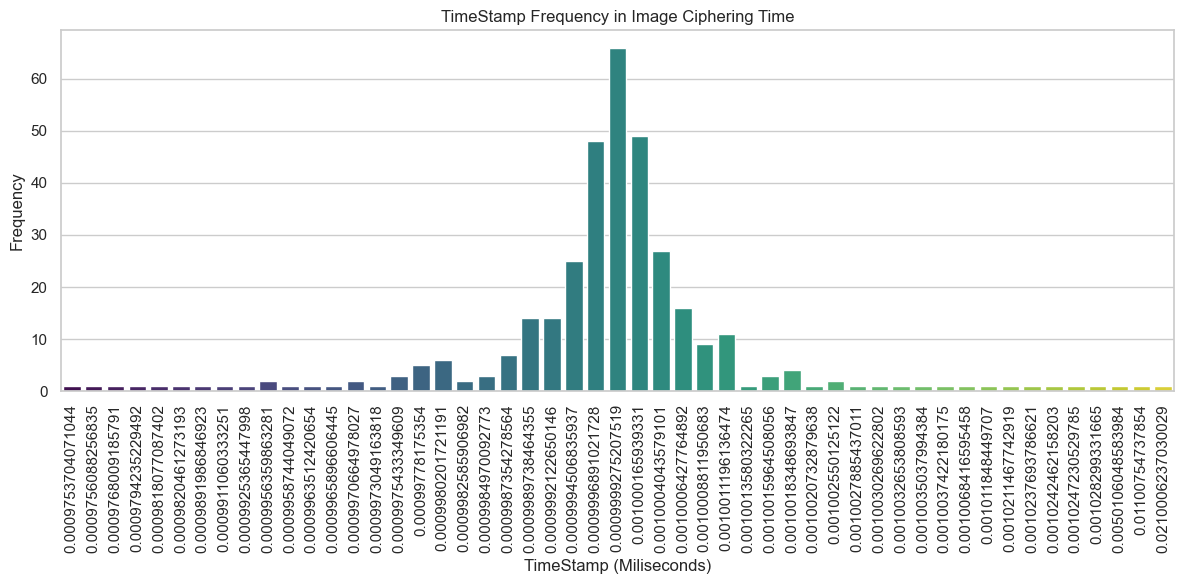

In [220]:
# Filter
TimeStamp_counts_filtered = TimeStamp_count.loc[(TimeStamp_count < TimeStamp_count.max())].sort_index() # TimeStamp_count.max(): 66187
# Crear el gráfico de barras
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=TimeStamp_counts_filtered.index.astype(str), y=TimeStamp_counts_filtered.values, palette="viridis")
plt.xlabel('TimeStamp (Miliseconds)')
plt.ylabel('Frequency')
plt.title('TimeStamp Frequency in Image Ciphering Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Decoded Time**

In [221]:
data_decoded.describe()

,TimeStamp,Decoded_Values
count,66612.000000,0.0
mean,0.000008,NaN
std,0.000105,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN
max,0.015016,NaN


In [222]:
# Time to cipher one pixel (X,X,X,X) in miliseconds:
# Time min: 0.000008
# Time max: 0.015016	
# Time mean: 0.000008 

In [186]:
TimeStamp_count_decoded = data_decoded['TimeStamp'].value_counts()
TimeStamp_count_decoded

TimeStamp
0.000000    65936
0.001000      112
0.001000       74
0.001000       63
0.000999       31
0.001000       30
0.001001       23
0.001002       22
0.001001       21
0.000999       20
0.000999       17
0.000999       16
0.001002       16
0.000998       15
0.000998       14
0.001002       14
0.000998       13
0.001003       13
0.000998       13
0.000998       12
0.000997       12
0.001001       11
0.000997       11
0.001002       10
0.001003        9
0.000997        7
0.001005        7
0.001004        6
0.001003        5
0.001004        4
0.001001        4
0.000996        4
0.001004        4
0.000996        4
0.000997        3
0.001005        3
0.000995        3
0.001003        3
0.000996        3
0.000992        2
0.001004        2
0.000994        2
0.001004        2
0.000991        1
0.017008        1
0.001005        1
0.000993        1
0.000995        1
0.001005        1
0.000995        1
0.000994        1
0.000993        1
0.001007        1
0.001006        1
0.000993        1


C:\Users\user\AppData\Local\Temp\ipykernel_17980\3638991006.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TimeStamp_counts_filtered.index.astype(str), y=TimeStamp_counts_filtered.values, palette="viridis")


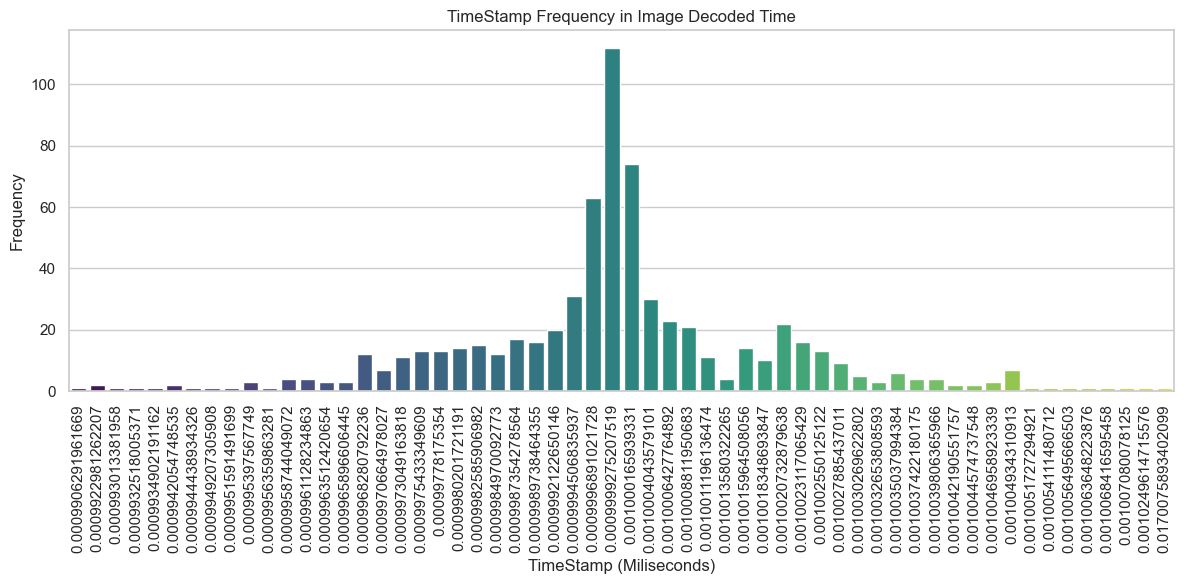

In [223]:
# Filter
TimeStamp_counts_filtered = TimeStamp_count_decoded.loc[(TimeStamp_count_decoded < TimeStamp_count_decoded.max())].sort_index() # TimeStamp_count_decoded.max(): 66187
# Crear el gráfico de barras
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=TimeStamp_counts_filtered.index.astype(str), y=TimeStamp_counts_filtered.values, palette="viridis")
plt.xlabel('TimeStamp (Miliseconds)')
plt.ylabel('Frequency')
plt.title('TimeStamp Frequency in Image Decoded Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Are the images different?**

In [231]:
# Method Haslib to verify if the images are different or not
import hashlib

def sha256_hash(file_path):
    sha256 = hashlib.sha256()
    with open(file_path, 'rb') as file:
        while chunk := file.read(8192):
            sha256.update(chunk)
            
    return sha256.hexdigest()

orginal_image = sha256_hash('./C_and_D_png/box.png')
decoded_image = sha256_hash('./C_and_D_png/resultados/descifrado.png')
print(orginal_image)
print(decoded_image)
if (orginal_image == decoded_image ):
    print("Are the same image")
    
print("The images are diferents")

a84cb3be973de9d9e9c96589a2430274fdbf2086010bdad53a0a7d3d8ca94d79
0821ab44c3d1e23049d8aa61e0707fd91c6eb8fc2c0fb5dc96593c54d5af0a6e
The images are diferents
